In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [42]:
df = pd.read_csv('/content/drive/MyDrive/DATA SET/insurance.csv')

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [44]:
df.shape

(1338, 7)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Figure size 600x600 with 0 Axes>

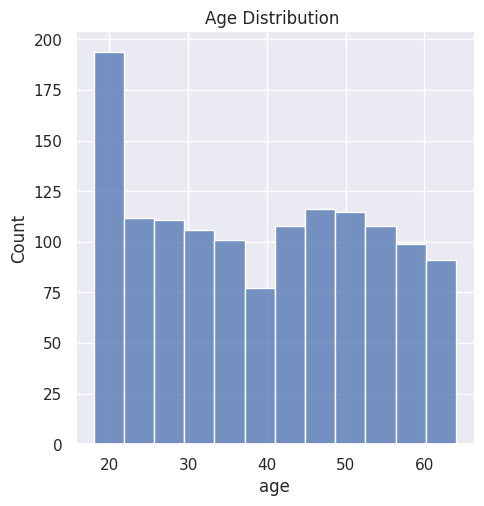

In [47]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title("Age Distribution ")
plt.show()

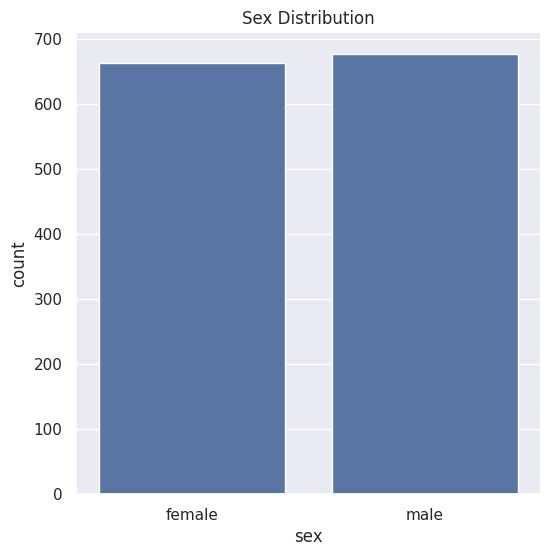

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex", data=df)
plt.title("Sex Distribution")
plt.show()

In [49]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


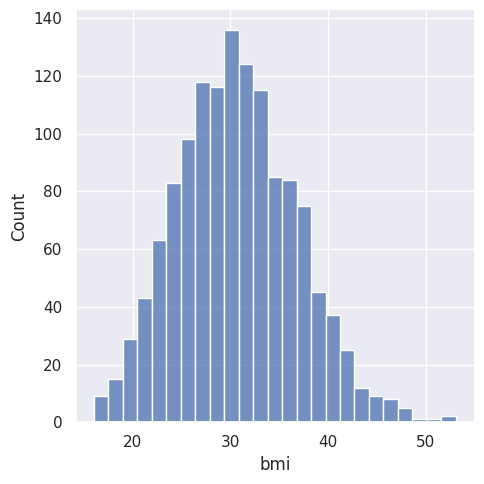

In [50]:
sns.displot(df['bmi'])
plt.show()

In [51]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [52]:
df.replace({'sex':{'male':0,'female':1}},inplace = True)

In [53]:
df.replace({'smoker':{'yes':0,'no':1}},inplace = True)

In [54]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [55]:
x =df.drop(columns="expenses",axis = 1)
y = df['expenses']

In [56]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,0,1
1,18,0,33.8,1,1,0
2,28,0,33.0,3,1,0
3,33,0,22.7,0,1,3
4,32,0,28.9,0,1,3
...,...,...,...,...,...,...
1333,50,0,31.0,3,1,3
1334,18,1,31.9,0,1,2
1335,18,1,36.9,0,1,0
1336,21,1,25.8,0,1,1


In [57]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [58]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [59]:
x_train.shape

(1070, 6)

In [60]:
x_test.shape

(268, 6)

In [61]:
reg = LinearRegression()

In [62]:
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
training_data_prediction = reg.predict(x_train)

In [64]:
r2_train = metrics.r2_score(y_train,training_data_prediction)

In [65]:
r2_train

0.7316860190674072

In [66]:
test_data_prediction = reg.predict(x_test)

In [67]:
metrics.r2_score(y_test,test_data_prediction)

0.8298347915464466

In [68]:
sample_input_data=(30,1,22.7,0,1,0)

In [69]:
input_data_as_numpy_array = np.asarray(sample_input_data)

In [70]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [71]:
prediction = reg.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
print("The insurance cost is ", prediction)

The insurance cost is  [2640.35262548]
